Log Space? False
Scaled with Radius? False


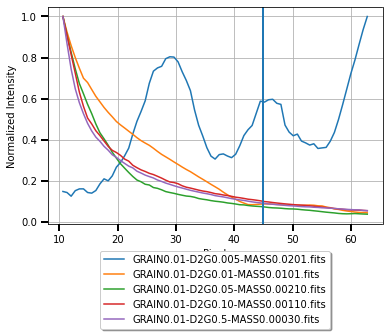

Log Space? False
Scaled with Radius? False


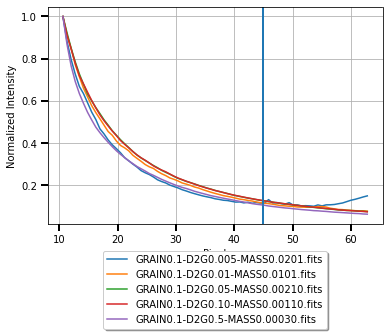

Log Space? False
Scaled with Radius? False


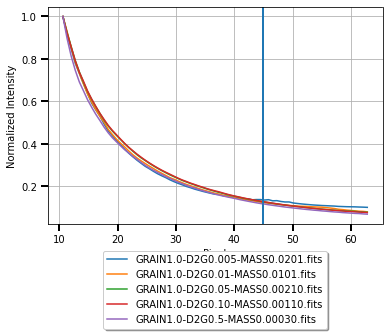

In [1]:
import glob
import FitsFile as FF
import numpy as np

### Opens the file
with open('distance_output.file') as f:
    ### Reads the file
    distance = f.readlines()

### Gets the pairs of file_name and distance   
file_distance = []
for i in range(int(len(distance))):
    if i % 2 == 0:
        file_name = distance[i].strip()
        au = distance[i+1].strip()
        
        file_distance.append(np.asarray((file_name,au)))


file_list = glob.glob('*.fits')
file_list.sort()

FF.plot_fits(file_list[:5], logSpace = False, radiusScale=False)
FF.plot_fits(file_list[5:10], logSpace = False, radiusScale=False)
FF.plot_fits(file_list[10:15], logSpace = False, radiusScale=False)

Log Space? True
Scaled with Radius? False


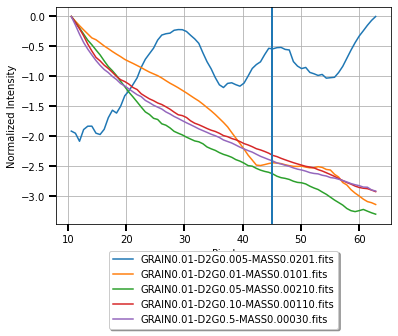

Log Space? True
Scaled with Radius? False


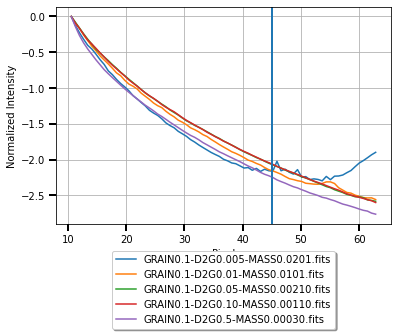

Log Space? True
Scaled with Radius? False


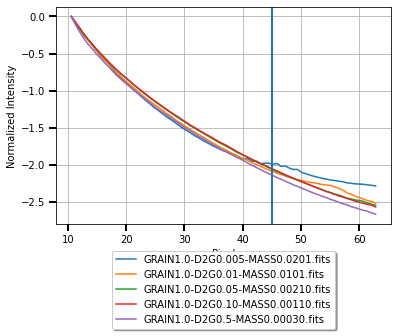

In [2]:
FF.plot_fits(file_list[:5], logSpace = True, radiusScale=False)
FF.plot_fits(file_list[5:10], logSpace = True, radiusScale=False)
FF.plot_fits(file_list[10:15], logSpace = True, radiusScale=False)

Log Space? True
Scaled with Radius? True


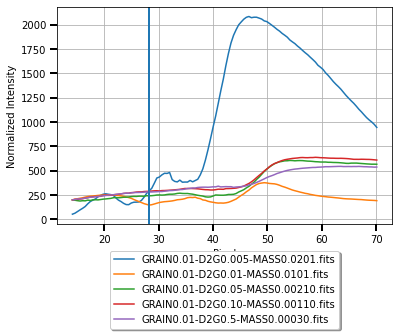

Log Space? True
Scaled with Radius? True


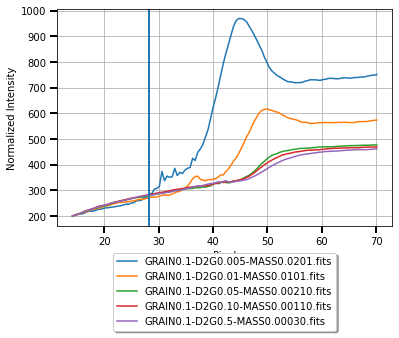

Log Space? True
Scaled with Radius? True


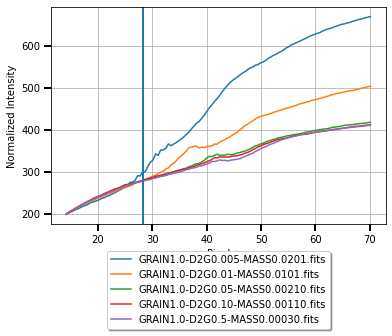

In [3]:
FF.plot_fits(file_list[:5], logSpace = True, radiusScale=True)
FF.plot_fits(file_list[5:10], logSpace = True, radiusScale=True)
FF.plot_fits(file_list[10:15], logSpace = True, radiusScale=True)

In [3]:
#!/usr/bin/env python
# coding: utf-8

# In[2]:


import os
import glob
import numpy as np
import astropy.io as astr
import matplotlib.pyplot as plt
from matplotlib import colors
from astropy.visualization import astropy_mpl_style
from astropy.utils.data import get_pkg_data_filename
from matplotlib.ticker import AutoMinorLocator

def radial_profile(data, center):
    y, x = np.indices((data.shape))
    r = np.sqrt((x - center[0])**2 + (y - center[1])**2)
    r = r.astype(np.int)
    
    tbin = np.bincount(r.ravel(), data.ravel())
    nr = np.bincount(r.ravel())
    radialprofile = tbin / nr
    
    
    
    return radialprofile 

def plot_fits(file_list, logSpace, radiusScale, planet=52.17, lBoundary=0, uBoundary=200):
    """
    INPUTS:
    --------
     
    
    
    OUTPUTS:
    --------
    
    
    """
    
    ### AU per bin
    scale = 200/425
    planet_locale = planet 
    
    
    print('Log Space? {}'.format(logSpace))
    print('Scaled with Radius? {}'.format(radiusScale))  
    
    plt.figure()
    for i in range(len(file_list)):
        ### Extracting relevant info from fits file with astropy.fits
        filename = file_list[i]
        hdul = get_pkg_data_filename(filename)
        image_data = astr.fits.getdata(hdul, ext=0)
        data = image_data[0][0][0][:][:]
        
        ### Need to define the center for the radial profile
        center = (data.shape[0]/2,data.shape[1]/2)
        profile = radial_profile(data, center)
        
        ### This becomes the x-axis
        length = np.linspace(0,200,425) 
        
        ### Cuttomg down profile to Upper and Lower Boundary
        mod_profile = profile[lBoundary:uBoundary]
        normalized_profile = mod_profile/mod_profile.max()
        
        ### This ensures that even when truncated, x-axis is labeled correctly
        r_scale = center[0]/profile.shape[0]

        if logSpace == True:
            intensity_profile = np.log(normalized_profile)
            
        else:
            intensity_profile = normalized_profile
        
        if radiusScale == True:
            r_squared = length[lBoundary:uBoundary] ** 2
            intensity_profile = normalized_profile * r_squared
        
        plt.plot(length[lBoundary:uBoundary], intensity_profile, label=filename)


        plt.tick_params(which='both', width=2)
        plt.tick_params(which='major', length=7)
        plt.tick_params(which='minor', length=4, color='r')
        plt.grid()
        plt.xlabel('Pixel')
        plt.ylabel('Normalized Intensity')
        plt.grid(which="minor")
        plt.legend(loc='upper center', bbox_to_anchor=(0.5, -0.10),
          fancybox=True, shadow=True)
        plt.axvline(x = planet_locale/2)
    plt.show()   

Log Space? True
Scaled with Radius? False


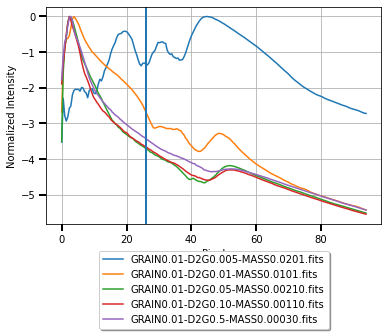

In [4]:
import glob

file_list = glob.glob('*.fits')
file_list.sort()

plot_fits(file_list[:5], logSpace = True, radiusScale=False)